In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:.2f}'.format

# Corrigir o link para o formato 'raw' do GitHub
url = 'https://raw.githubusercontent.com/gelborin/projetoaplicado1_AAAEV/main/dataset/Global%20COVID-19%20Data%20(2020-2024)/Global%20COVID-19%20Data%20(2020-2024)/WHO-COVID-19-global-data.csv'

# Ler o arquivo CSV
base = pd.read_csv(url, sep=';')

# Mostrar as primeiras linhas
base.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [5]:
base.duplicated().sum()

0

In [6]:
#Analisa cada campo fazendo uma contagem distinta para cada campo
val_unic = []
for i in base.columns[0:9].tolist():
    print(i, ':', len(base[i].astype(str).value_counts()))
    val_unic.append(len(base[i].astype(str).value_counts()))

Date_reported : 241
Country_code : 240
Country : 240
WHO_region : 8
New_cases : 11953
Cumulative_cases : 34010
New_deaths : 2139
Cumulative_deaths : 14261


In [10]:
base['New_cases'].isnull().sum()

18812

In [12]:
base.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [14]:
def proporcao_de_nulos(base):
  colunas = base.columns
  for col in colunas:
    nulos = base[col].isnull().sum() #conta o número de nulos a cada iteração
    proporcao = nulos/len(base)
    if round(proporcao * 100, 2) > 0:
        print(f'A coluna {col} apresenta {round(proporcao * 100, 2)}% de nulos.')

proporcao_de_nulos(base)

A coluna Country_code apresenta 0.42% de nulos.
A coluna WHO_region apresenta 7.5% de nulos.
A coluna New_cases apresenta 32.52% de nulos.
A coluna New_deaths apresenta 56.78% de nulos.


In [30]:
df_numeric = base.select_dtypes(include=['float64', 'int64'])

# Verificar a existência de outliers (usando o método de quantis)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print("Outliers por coluna:\n", outliers)

Outliers por coluna:
 New_cases            6271
Cumulative_cases     8920
New_deaths           3833
Cumulative_deaths    9119
dtype: int64


In [31]:
#Faz a soma de casos de covid em cada País

base_tp3 = base.groupby('Country')['New_deaths'].sum()

print(base_tp3)

Country
Afghanistan                                                7998.00
Albania                                                    3605.00
Algeria                                                    6881.00
American Samoa                                               34.00
Andorra                                                     159.00
                                                             ...  
Wallis and Futuna                                             9.00
Yemen                                                      2159.00
Zambia                                                     4077.00
Zimbabwe                                                   5740.00
occupied Palestinian territory, including east Jerusalem   5708.00
Name: New_deaths, Length: 240, dtype: float64


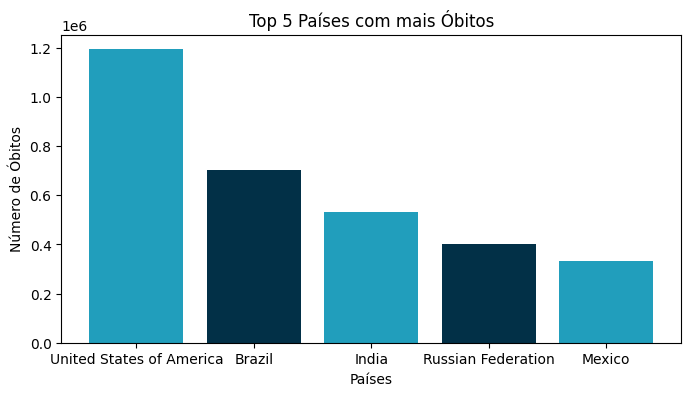

In [ ]:
# Agrupar por país e calcular a soma de 'New_deaths'
base_tp3 = base.groupby('Country')['New_deaths'].sum()

# Ordenar os resultados
sorted_data = base_tp3.sort_values(ascending=False)

# Selecionar os 5 países com maior soma
top_3_countries = sorted_data.head(5).index.tolist()  # Extrair os nomes dos países

# Selecionar os valores de óbitos para os 5 países
top_3_deaths = sorted_data.head(5).values

plt.figure(figsize=(8, 4))
#ax.axis('off')

plt.bar(top_3_countries, top_3_deaths, color=['#219ebc', '#023047'])
plt.title("Top 5 Países com mais Óbitos")
plt.xlabel("Países")
plt.ylabel("Número de Óbitos")
plt.show()

In [ ]:
#Grafico de arvore para verfificarmos todos os paises que tiveram obito do maior para o menor
fig = px.treemap(base, path=[px.Constant("Todos os paises com mais obito"),'Country'], values='New_deaths')

fig.show()

In [ ]:
'''base['Date_reported'].nunique()
base.head()
'''
base_tp4 = base.groupby('Date_reported')['New_deaths'].sum()
base_tp4.head()

,New_deaths
Date_reported,
01/01/2023,32378.00
01/03/2020,519.00
01/05/2022,16264.00
01/08/2021,65093.00
01/10/2023,2527.00


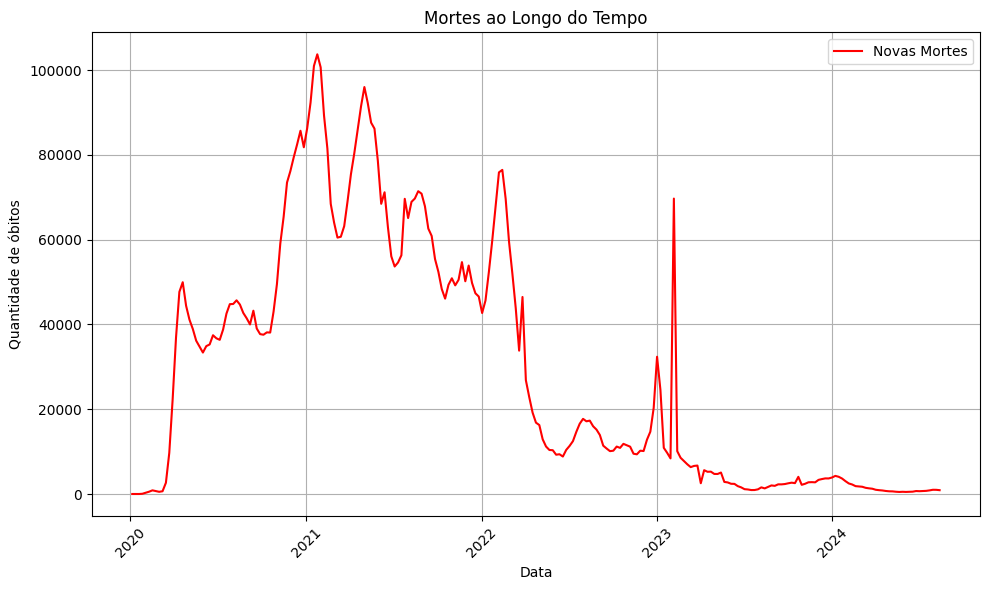

In [ ]:
# Garantir que a coluna de data esteja no formato datetime e a data seja o índice
base['Date_reported'] = pd.to_datetime(base['Date_reported'], dayfirst=True)

# Agrupar por data e somar as novas mortes por dia (caso haja múltiplas entradas por dia)
base_grouped = base.groupby('Date_reported')['New_deaths'].sum()

# Plotar o gráfico com uma única linha
plt.figure(figsize=(10, 6))
plt.plot(base_grouped.index, base_grouped, label='Novas Mortes', color='red')

# Adicionar título e rótulos
plt.title('Mortes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de óbitos')

# Melhorar a legibilidade das datas no eixo x
plt.xticks(rotation=45)

# Adicionar uma grade e a legenda
plt.grid(True)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [17]:
#Extrai dataset tabela COVID

url = 'https://raw.githubusercontent.com/gelborin/projetoaplicado1_AAAEV/refs/heads/main/dataset/Global%20COVID-19%20Data%20(2020-2024)/Global%20COVID-19%20Data%20(2020-2024)/WHO-COVID-19-global-table-data.csv'

table_cvd = pd.read_csv(url,sep= ',')
table_cvd = table_cvd[~table_cvd['Name'].isin(['Global', 'Other','NaN'])]
table_cvd.head(10)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Belarus,Europe,994037.00,10520.00,NaN,NaN,NaN,7118.00,75.00,NaN,NaN,NaN
1,China,Western Pacific,99375079.00,6754.00,1860.00,NaN,1860.00,122309.00,8.00,5.00,NaN,5.00
2,French Guiana,NaN,98041.00,32825.00,NaN,NaN,NaN,413.00,138.00,NaN,NaN,NaN
3,Latvia,Europe,977765.00,51254.00,NaN,NaN,NaN,7475.00,392.00,NaN,NaN,NaN
4,Saint Vincent and the Grenadines,Americas,9674.00,8720.00,NaN,NaN,NaN,124.00,112.00,NaN,NaN,NaN
5,Guinea-Bissau,Africa,9614.00,489.00,NaN,NaN,NaN,177.00,9.00,NaN,NaN,NaN
6,Niger,Africa,9518.00,39.00,NaN,NaN,NaN,315.00,1.00,NaN,NaN,NaN
7,Comoros,Africa,9109.00,1047.00,NaN,NaN,NaN,160.00,18.00,NaN,NaN,NaN
8,Antigua and Barbuda,Americas,9106.00,9299.00,NaN,NaN,NaN,146.00,149.00,NaN,NaN,NaN
9,Senegal,Africa,89485.00,534.00,NaN,NaN,NaN,1971.00,12.00,NaN,NaN,NaN


In [18]:
table_cvd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 240
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          240 non-null    object 
 1   WHO Region                                                    222 non-null    object 
 2   Cases - cumulative total                                      240 non-null    float64
 3   Cases - cumulative total per 100000 population                231 non-null    float64
 4   Cases - newly reported in last 7 days                         53 non-null     float64
 5   Cases - newly reported in last 7 days per 100000 population   37 non-null     float64
 6   Cases - newly reported in last 24 hours                       53 non-null     float64
 7   Deaths - cumulative total                                     240 non-null  

In [19]:
table_cvd.duplicated().sum()

0

In [32]:
def proporcao_de_nulos(table_cvd):
  colunas = table_cvd.columns
  for col in colunas:
    nulos = table_cvd[col].isnull().sum() #conta o número de nulos a cada iteração
    proporcao = nulos/len(table_cvd)
    if round(proporcao * 100, 2) > 0:
        print(f'A coluna {col} apresenta {round(proporcao * 100, 2)}% de nulos.')

proporcao_de_nulos(table_cvd)

A coluna WHO Region apresenta 7.69% de nulos.
A coluna Cases - cumulative total per 100000 population apresenta 1.28% de nulos.
A coluna Cases - newly reported in last 7 days apresenta 77.35% de nulos.
A coluna Cases - newly reported in last 7 days per 100000 population apresenta 84.19% de nulos.
A coluna Cases - newly reported in last 24 hours apresenta 77.35% de nulos.
A coluna Deaths - newly reported in last 7 days apresenta 90.17% de nulos.
A coluna Deaths - newly reported in last 7 days per 100000 population apresenta 99.57% de nulos.
A coluna Deaths - newly reported in last 24 hours apresenta 90.17% de nulos.


In [25]:
table_cvd.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

In [24]:
table_cvd.drop(columns=['Deaths - cumulative total per 100000 population'], inplace=True)
table_cvd.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Belarus,Europe,994037.00,10520.00,NaN,NaN,NaN,7118.00,NaN,NaN,NaN
1,China,Western Pacific,99375079.00,6754.00,1860.00,NaN,1860.00,122309.00,5.00,NaN,5.00
2,French Guiana,NaN,98041.00,32825.00,NaN,NaN,NaN,413.00,NaN,NaN,NaN
3,Latvia,Europe,977765.00,51254.00,NaN,NaN,NaN,7475.00,NaN,NaN,NaN
4,Saint Vincent and the Grenadines,Americas,9674.00,8720.00,NaN,NaN,NaN,124.00,NaN,NaN,NaN


In [26]:
#Remove os dados global que esta dentro do dataset que se refere ao total de casos e nao deve aparecer na soma
table_cvd = table_cvd[~table_cvd['Name'].isin(['Global', 'Other','NaN'])]

#Enxerga todas as regioes de forma unica
table_cvd['WHO Region'].nunique()
table_cvd.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Belarus,Europe,994037.00,10520.00,NaN,NaN,NaN,7118.00,NaN,NaN,NaN
1,China,Western Pacific,99375079.00,6754.00,1860.00,NaN,1860.00,122309.00,5.00,NaN,5.00
2,French Guiana,NaN,98041.00,32825.00,NaN,NaN,NaN,413.00,NaN,NaN,NaN
3,Latvia,Europe,977765.00,51254.00,NaN,NaN,NaN,7475.00,NaN,NaN,NaN
4,Saint Vincent and the Grenadines,Americas,9674.00,8720.00,NaN,NaN,NaN,124.00,NaN,NaN,NaN


In [29]:
df_numeric = table_cvd.select_dtypes(include=['float64', 'int64'])

# Verificar a existência de outliers (usando o método de quantis)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print("Outliers por coluna:\n", outliers)

Outliers por coluna:
 Cases - cumulative total                                        39
Cases - cumulative total per 100000 population                   1
Cases - newly reported in last 7 days                            5
Cases - newly reported in last 7 days per 100000 population      3
Cases - newly reported in last 24 hours                          5
Deaths - cumulative total                                       35
Deaths - newly reported in last 7 days                           2
Deaths - newly reported in last 7 days per 100000 population     0
Deaths - newly reported in last 24 hours                         2
dtype: int64


In [27]:

#Faz uma soma de acordo com a região para ver o acumulado de casos.
table_cvd = table_cvd[~table_cvd['Name'].isin(['Global'])]
table_cvd = table_cvd[~table_cvd['WHO Region'].isin(['Other'])]
table_cvd_1 = table_cvd.groupby('WHO Region')['Cases - cumulative total'].sum()

print(table_cvd_1)

WHO Region
Africa                    9043807.00
Americas                192737577.00
Eastern Mediterranean    23417911.00
Europe                  279539109.00
South-East Asia          61314608.00
Western Pacific         208553177.00
Name: Cases - cumulative total, dtype: float64


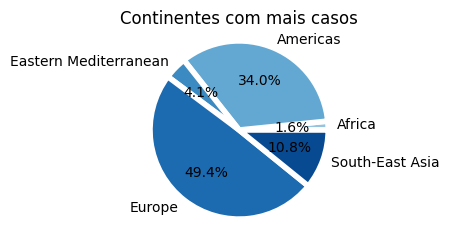

In [28]:
plt.style.use('_mpl-gallery-nogrid')
# Define as primeiros 5 categorias
x = table_cvd.groupby('WHO Region')['Cases - cumulative total'].sum().head(5)
regions  = x.index  # Nomes das regiões (rótulos)


colors = plt.get_cmap('Blues')(np.linspace(0.4, 0.9, len(x)))

# plot
fig, ax = plt.subplots()

ax.pie(x, labels=regions, colors=colors, radius=3,
       wedgeprops={"linewidth": 4, "edgecolor": "white"}, frame=True, autopct='%1.1f%%')
'''
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
'''
plt.title("Continentes com mais casos")

ax.axis('off')

plt.show()